In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from livelossplot import PlotLosses
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('./Train_Test_Network.csv')
df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,...,0,0,-,-,-,-,-,-,1,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,...,0,0,-,-,-,-,-,-,1,mitm


In [3]:
df = df.drop(["ts", "src_ip", "dst_ip", "src_port", "dst_port", 'ssl_subject',
 'ssl_issuer',
 'http_trans_depth',
 'http_method',
 'http_uri',
 'http_version',
 'http_user_agent',
 'http_orig_mime_types',
 'http_resp_mime_types',
 "dns_query",], axis=1)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['type'].value_counts())
df.head()

type
normal        117041
injection      19849
password       15248
ddos           11962
xss             8740
dos             6448
scanning        4493
backdoor        1966
mitm            1039
ransomware       260
Name: count, dtype: int64


,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,...,ssl_resumed,ssl_established,http_request_body_len,http_response_body_len,http_status_code,weird_name,weird_addl,weird_notice,label,type
264301,udp,dns,0.024009,52,285,SF,0,1,80,1,...,-,-,0,0,0,-,-,-,0,normal
30738,udp,dns,0.000695,0,298,SHR,0,0,0,2,...,-,-,0,0,0,-,-,-,0,normal
339932,tcp,http,0.021156,226,3978,SF,0,7,518,9,...,-,-,0,0,0,-,-,-,0,normal
7402,icmp,-,0.000142,354,0,OTH,0,2,410,0,...,-,-,0,0,0,-,-,-,0,normal
237936,udp,dns,0.022751,44,577,SF,0,1,72,1,...,-,-,0,0,0,-,-,-,0,normal


In [4]:
list(df)

['proto',
 'service',
 'duration',
 'src_bytes',
 'dst_bytes',
 'conn_state',
 'missed_bytes',
 'src_pkts',
 'src_ip_bytes',
 'dst_pkts',
 'dst_ip_bytes',
 'dns_qclass',
 'dns_qtype',
 'dns_rcode',
 'dns_AA',
 'dns_RD',
 'dns_RA',
 'dns_rejected',
 'ssl_version',
 'ssl_cipher',
 'ssl_resumed',
 'ssl_established',
 'http_request_body_len',
 'http_response_body_len',
 'http_status_code',
 'weird_name',
 'weird_addl',
 'weird_notice',
 'label',
 'type']

In [5]:
attack_type_counts = df['label'].value_counts().reset_index()
attack_type_counts

,label,count
0,0,117041
1,1,70005


In [5]:
columns = ['proto',
 'service',
 'duration',
 'src_bytes',
 'dst_bytes',
 'conn_state',
 'missed_bytes',
 'src_pkts',
 'src_ip_bytes',
 'dst_pkts',
 'dst_ip_bytes',
 'dns_qclass',
 'dns_qtype',
 'dns_rcode',
 'dns_AA',
 'dns_RD',
 'dns_RA',
 'dns_rejected',
 'ssl_version',
 'ssl_cipher',
 'ssl_resumed',
 'ssl_established',
 'http_request_body_len',
 'http_response_body_len',
 'http_status_code',
 'weird_name',
 'weird_addl',
 'weird_notice']

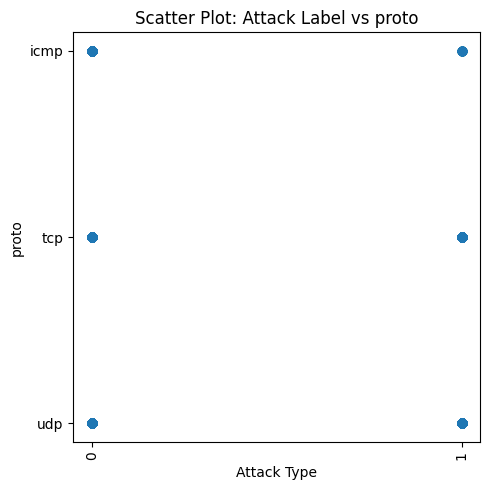

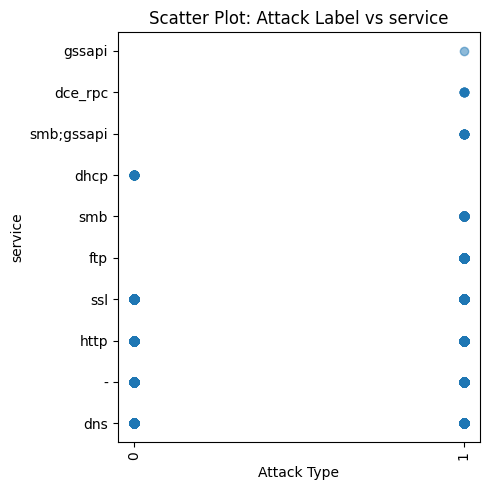

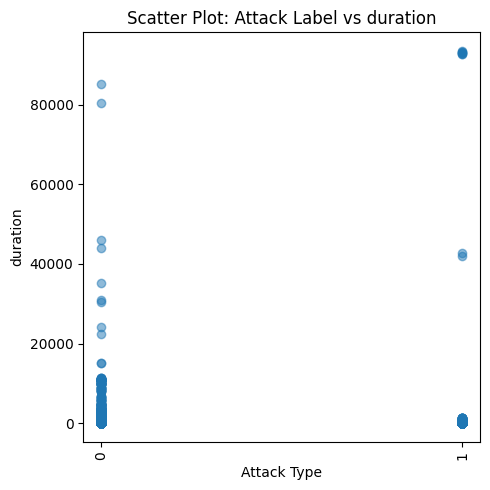

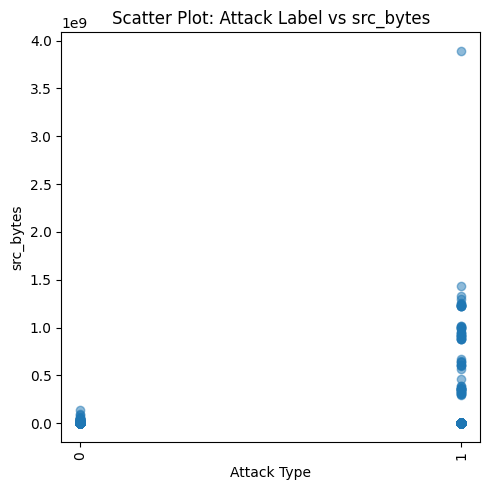

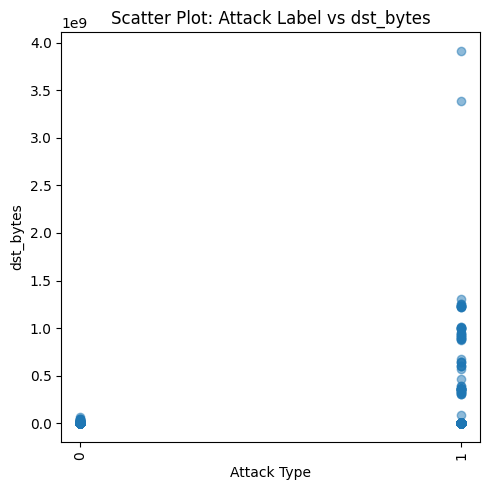

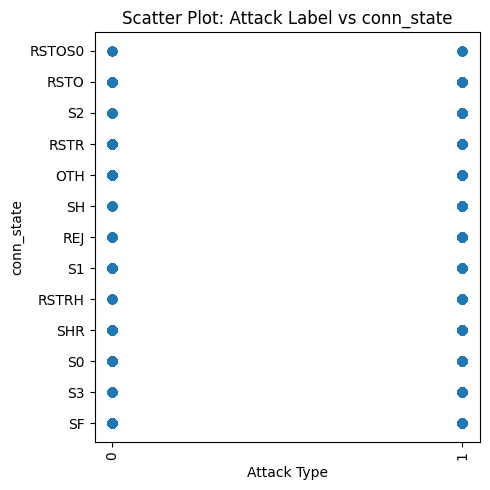

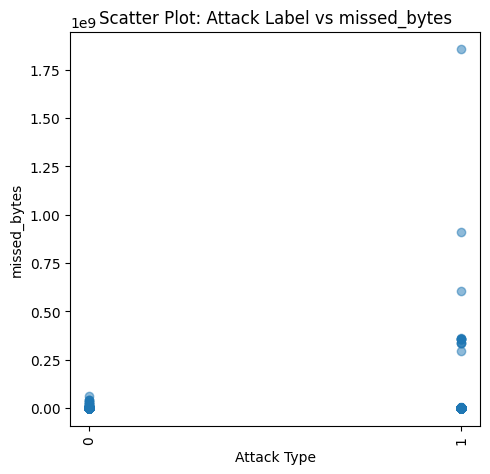

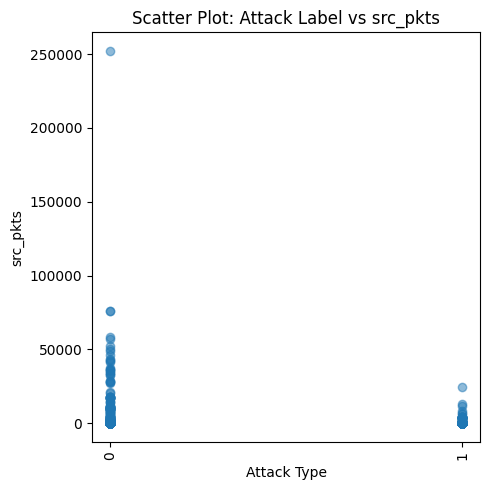

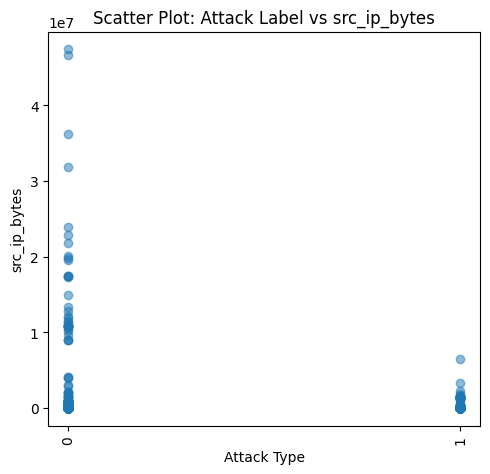

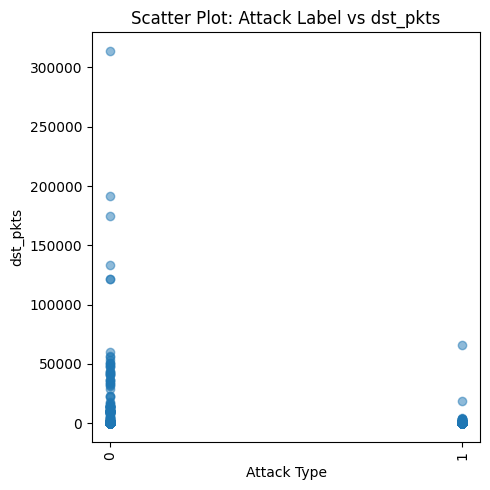

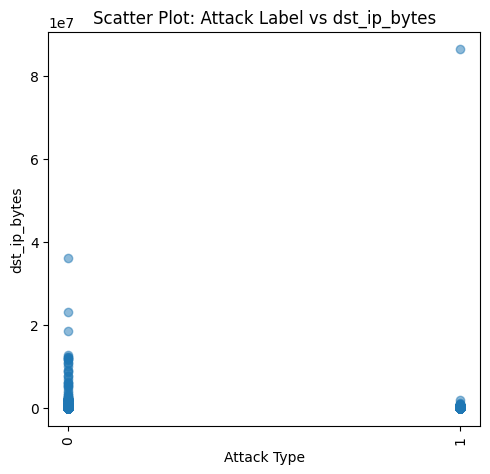

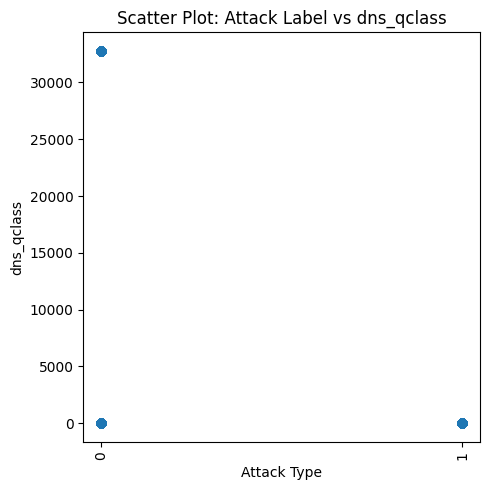

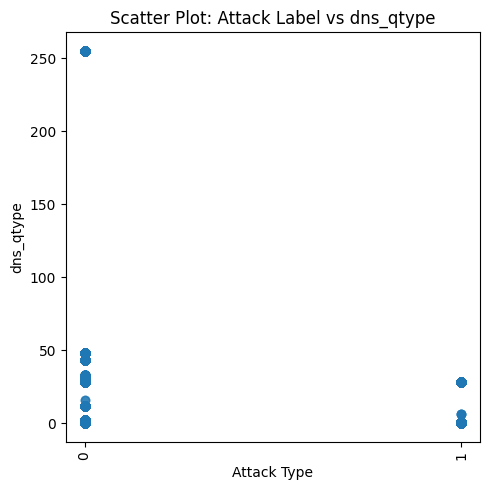

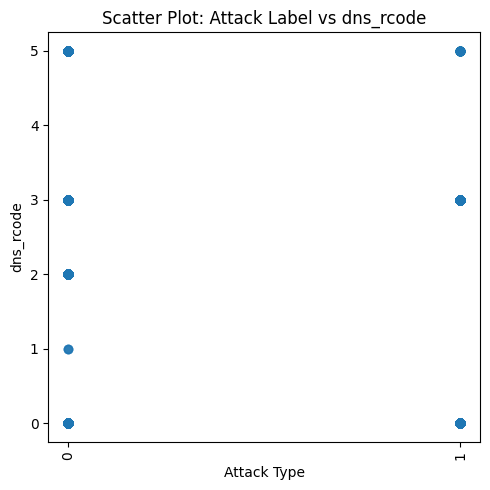

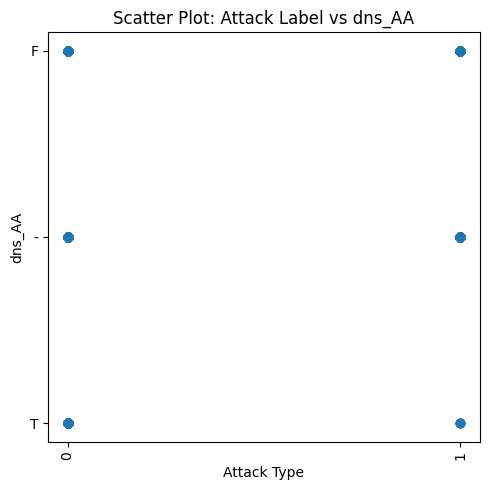

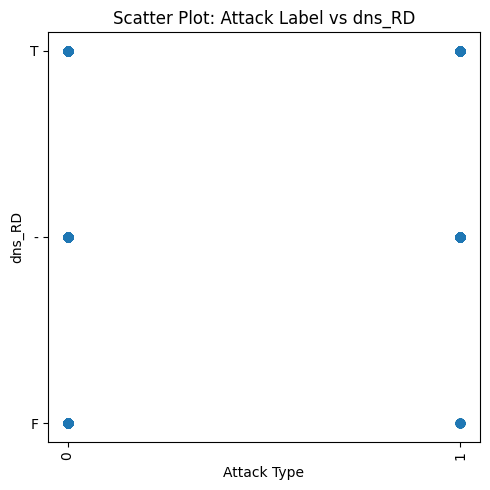

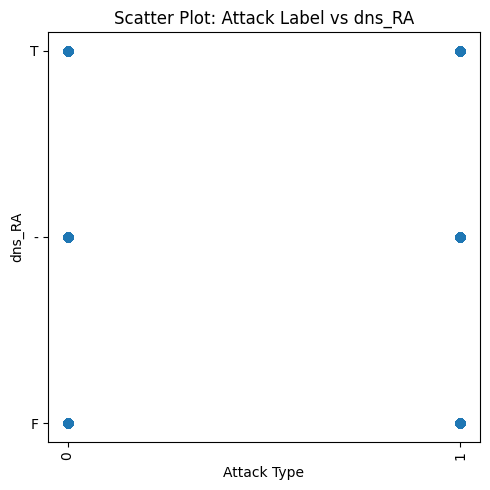

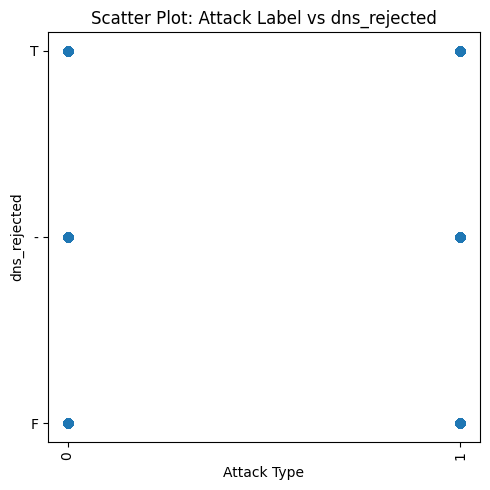

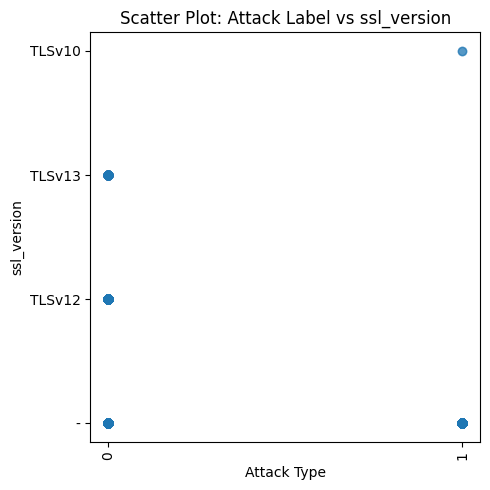

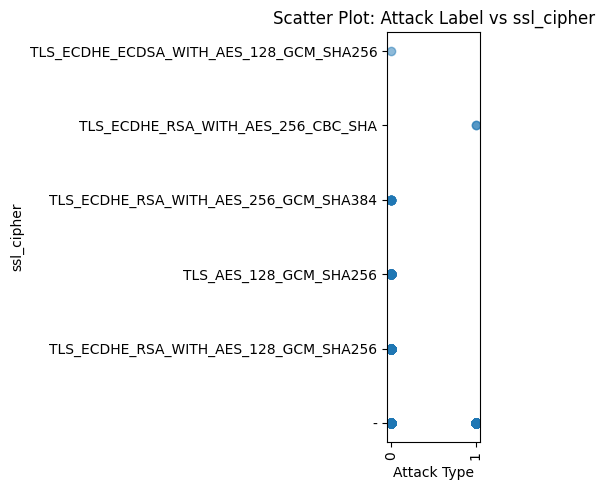

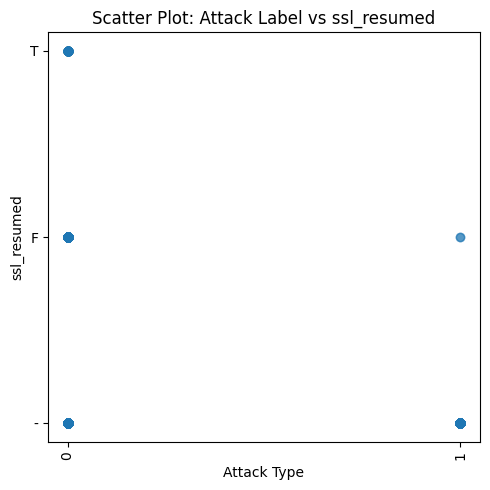

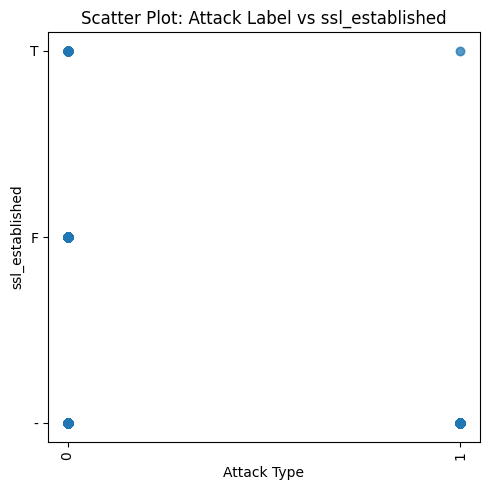

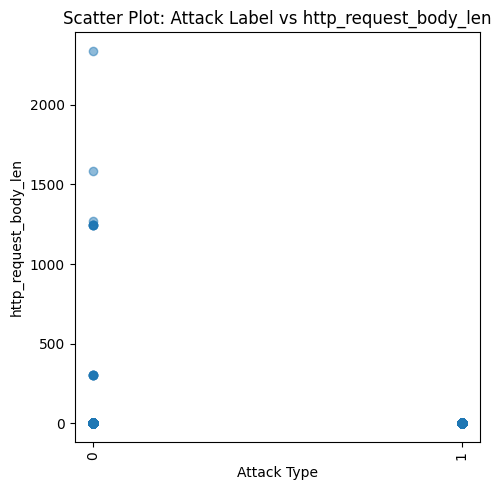

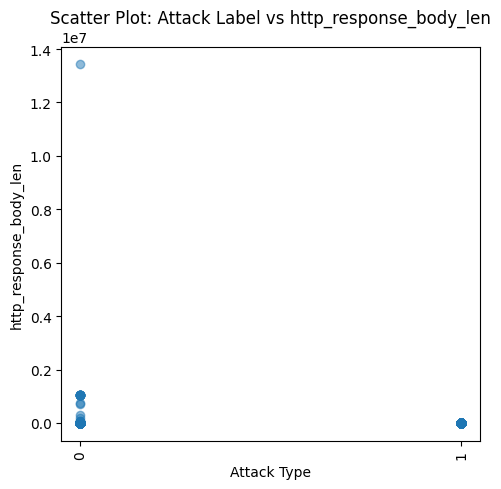

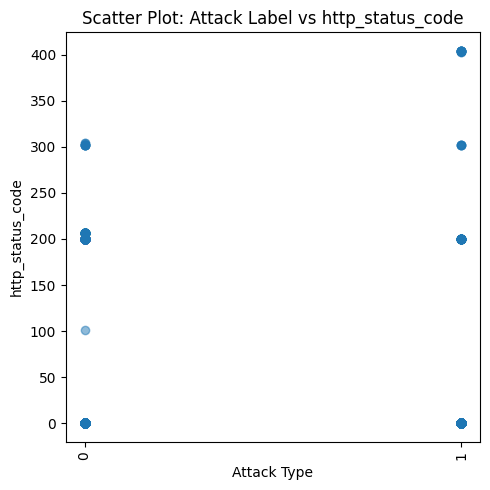

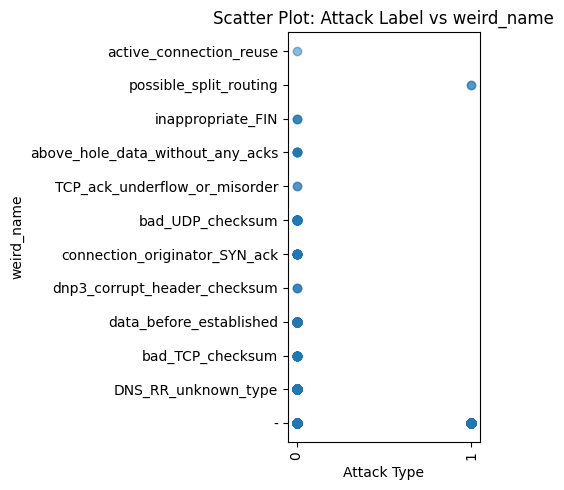

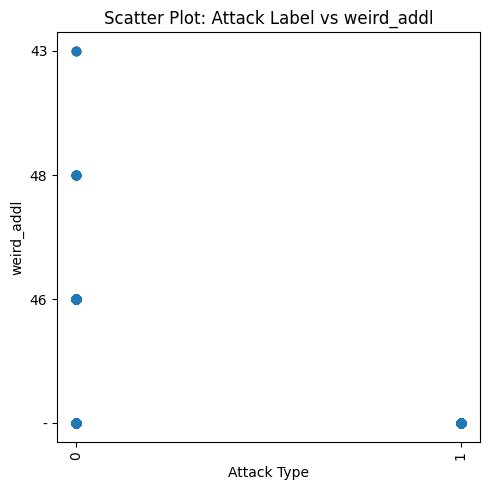

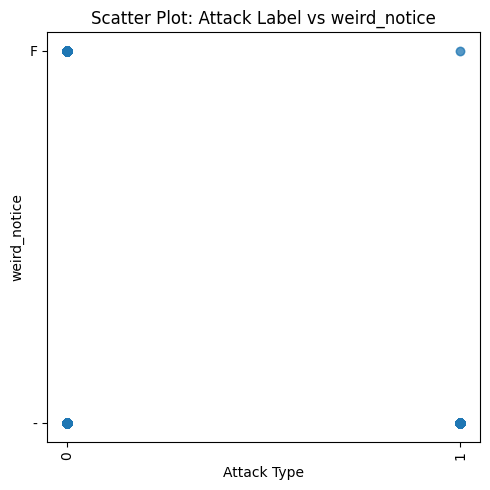

In [7]:
for i in columns:
    plt.figure(figsize=(5, 5))

    plt.scatter(df['label'], df[i], alpha=0.5)

    plt.title(f'Scatter Plot: Attack Label vs {i}')
    plt.xlabel('Attack Type')
    plt.ylabel(f'{i}')

    plt.xticks([0, 1], rotation='vertical')

    plt.tight_layout()

    plt.show()

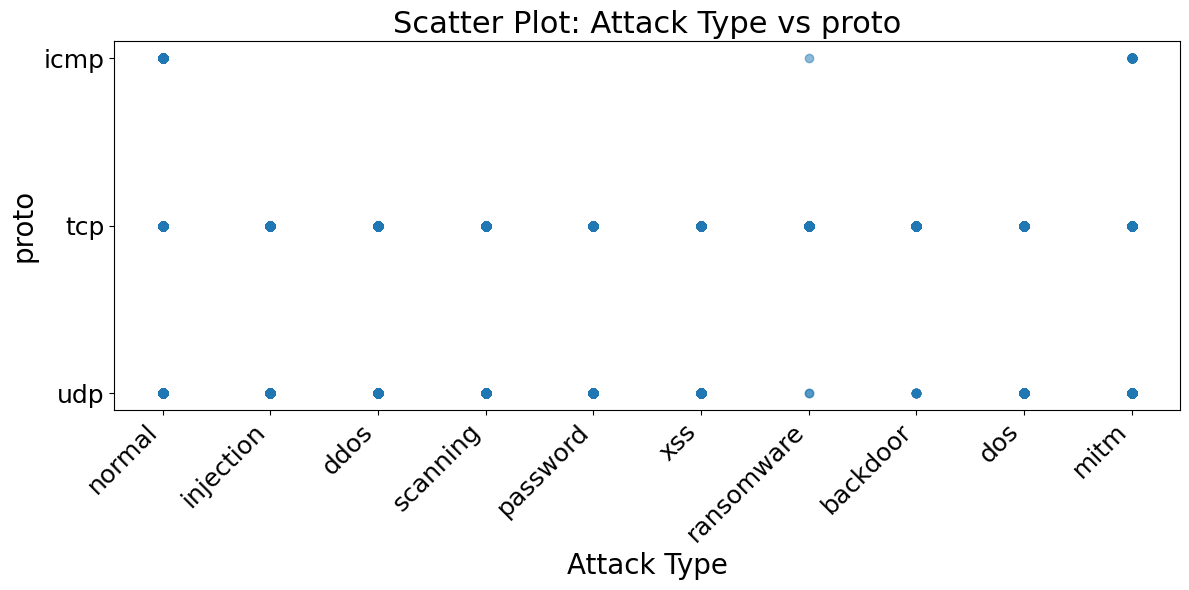

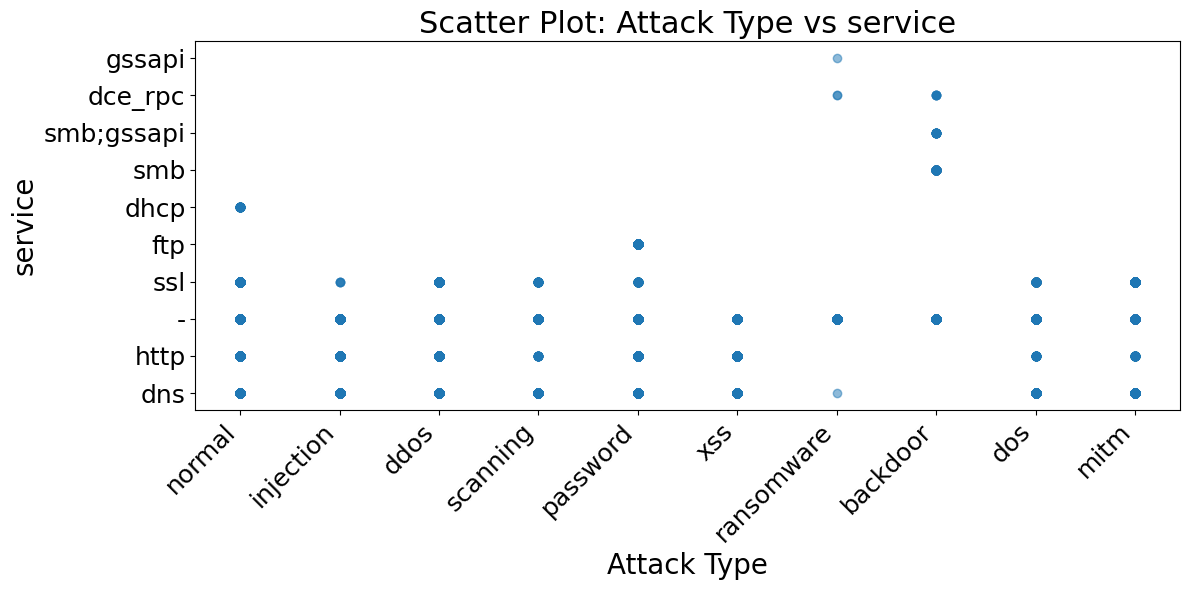

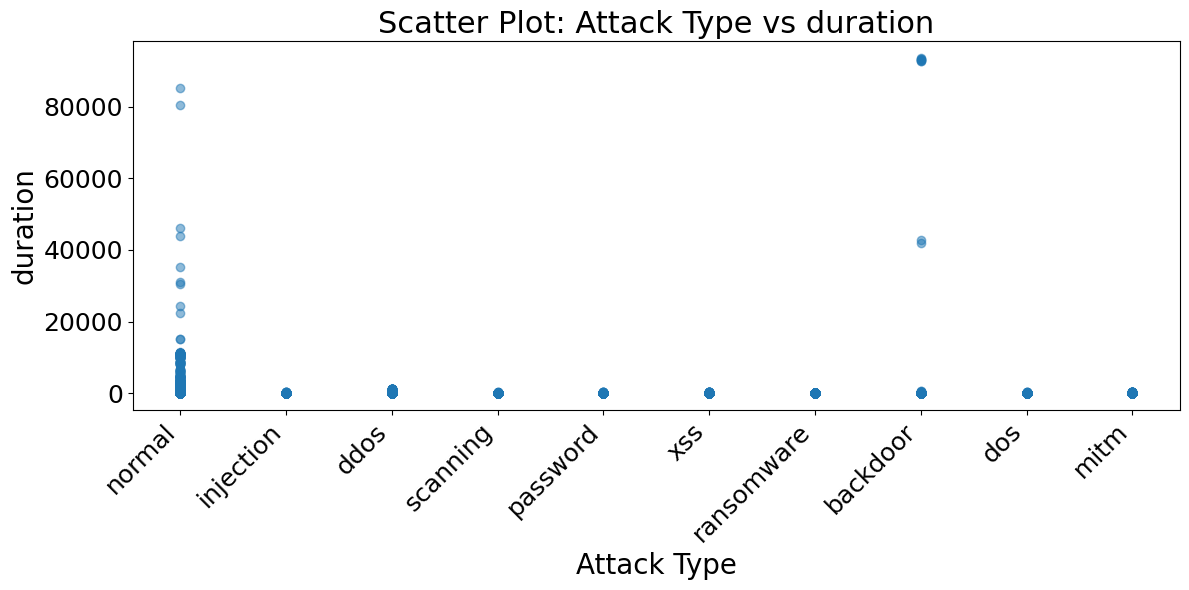

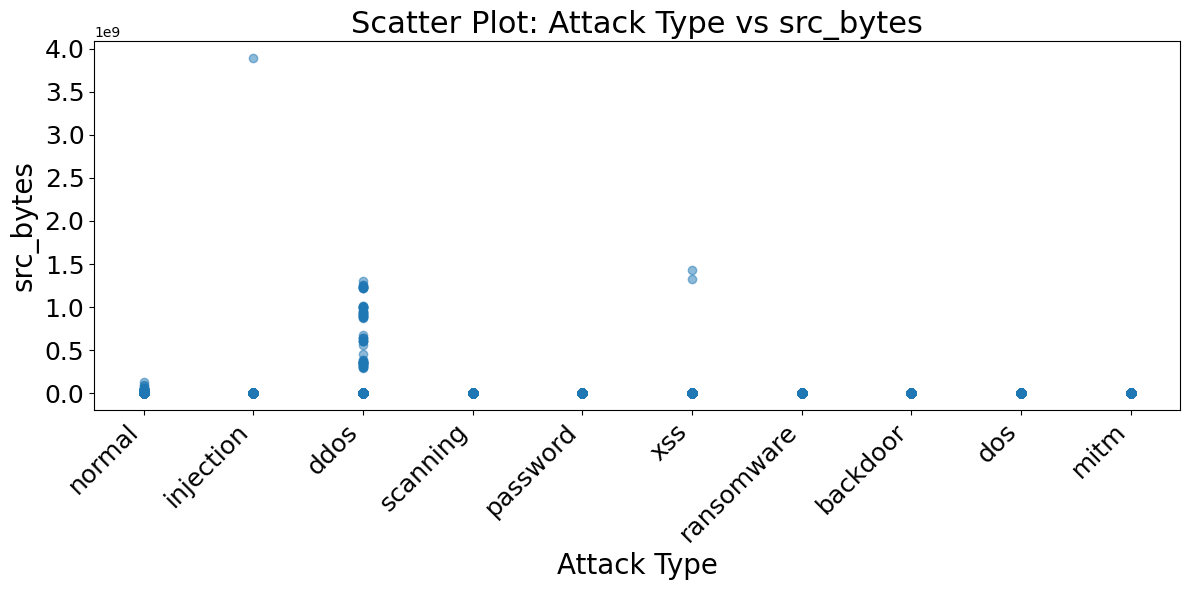

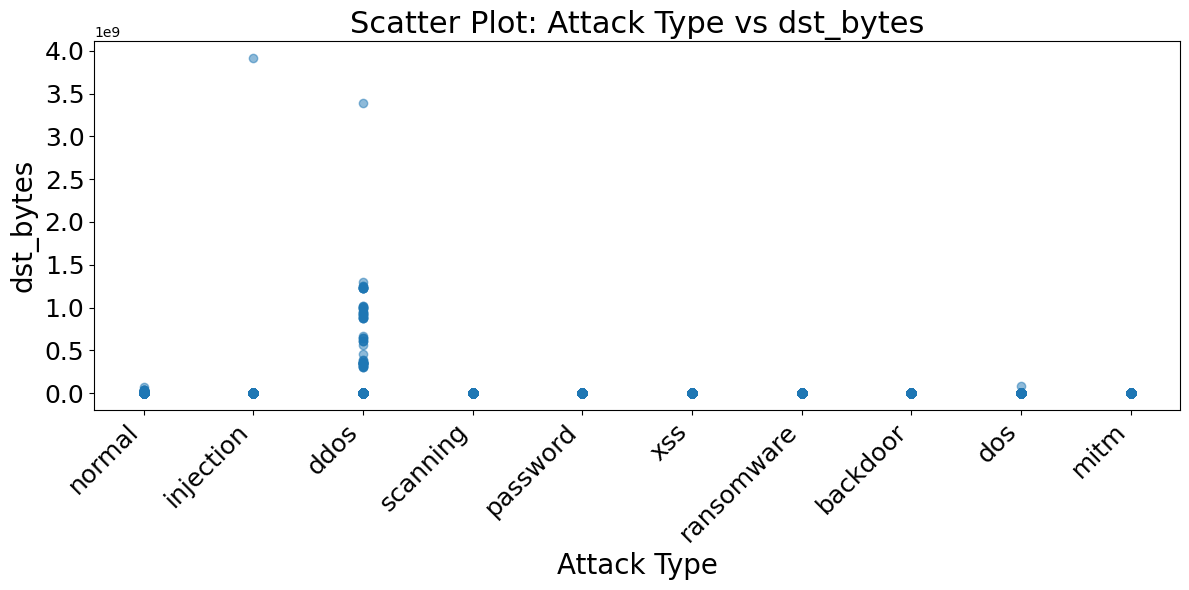

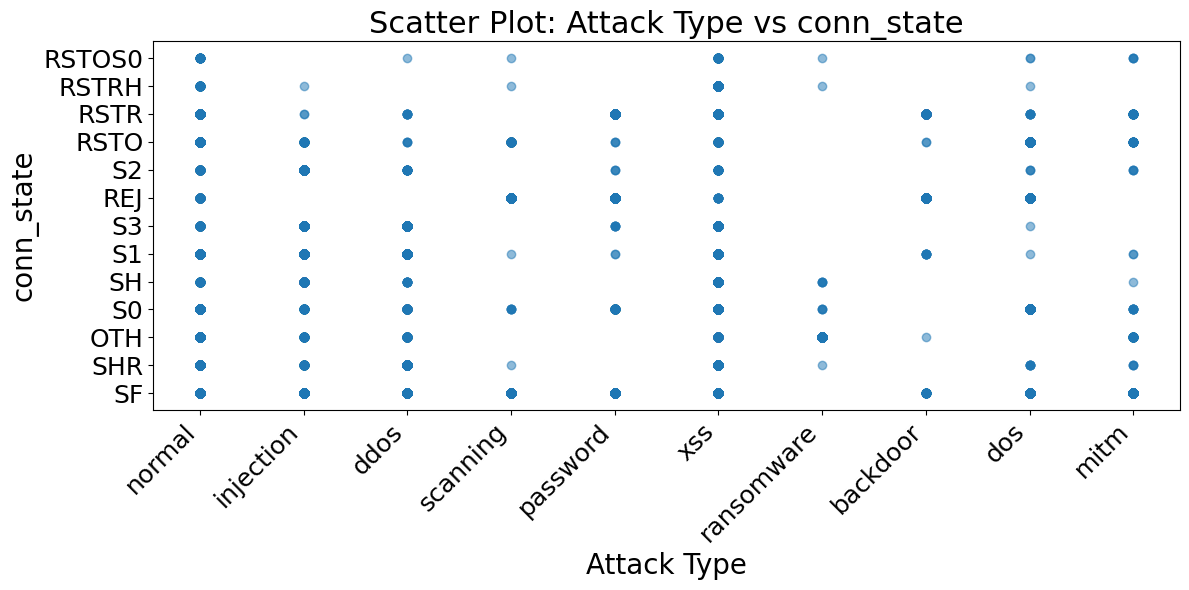

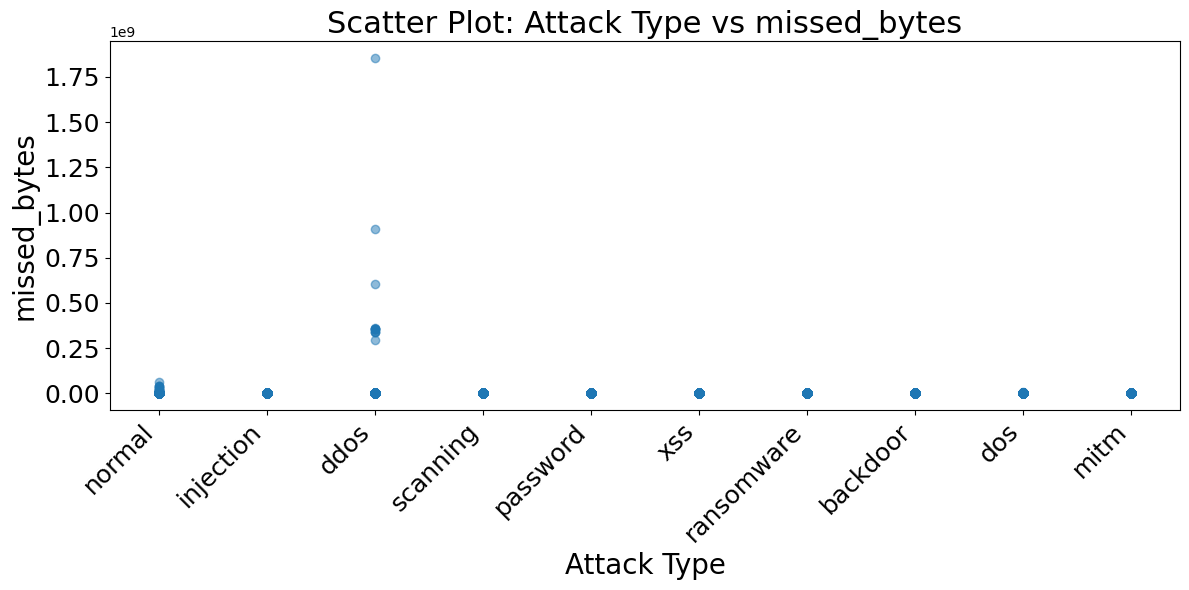

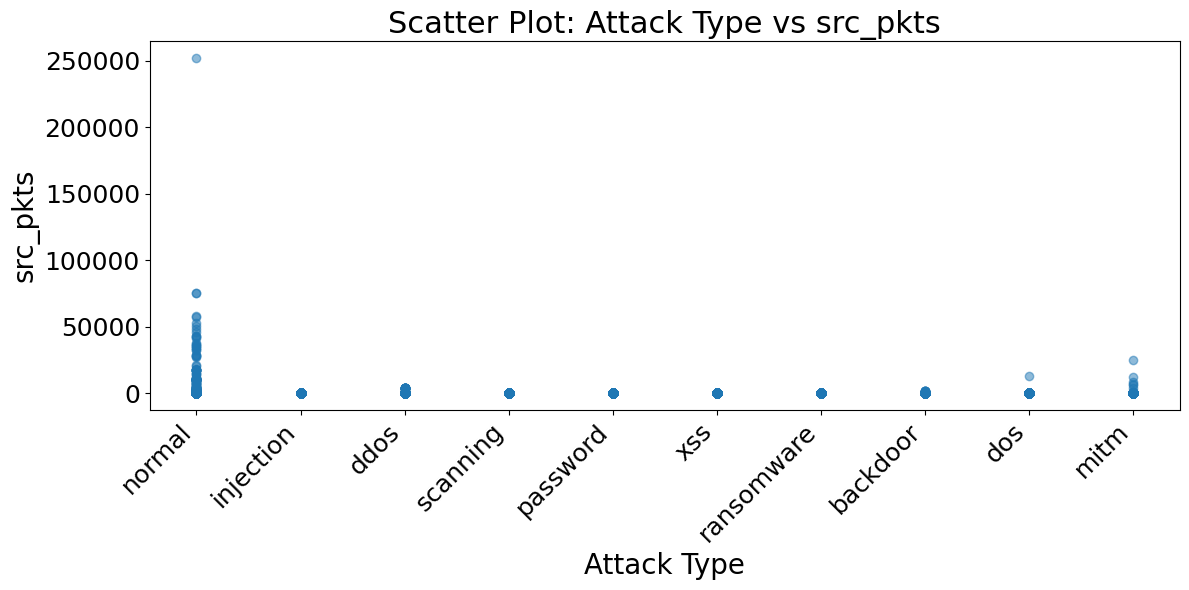

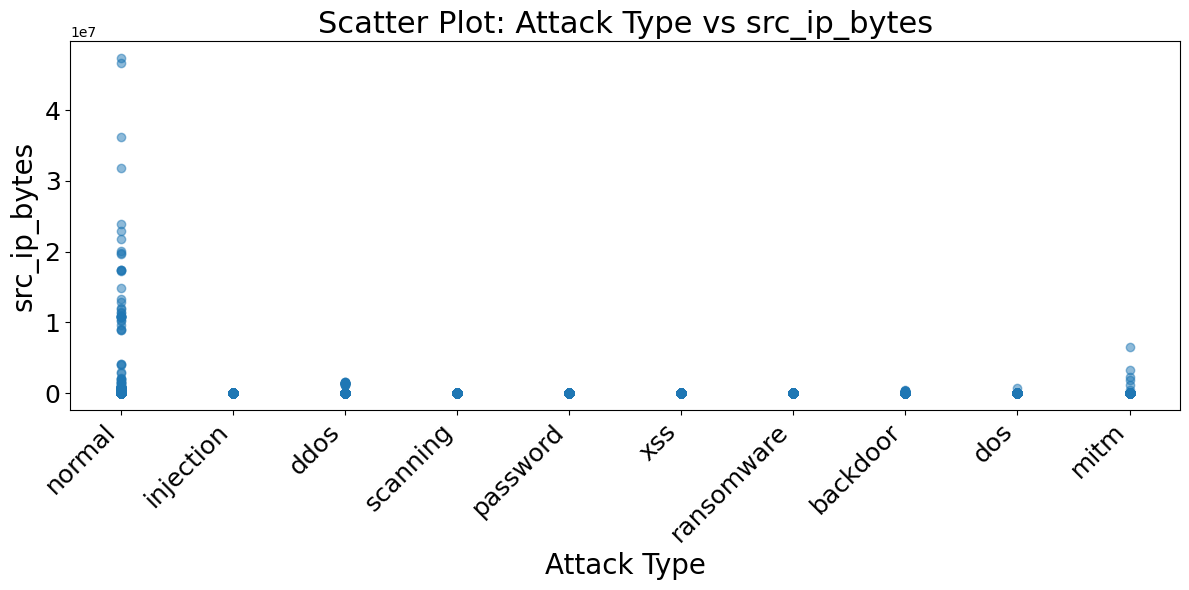

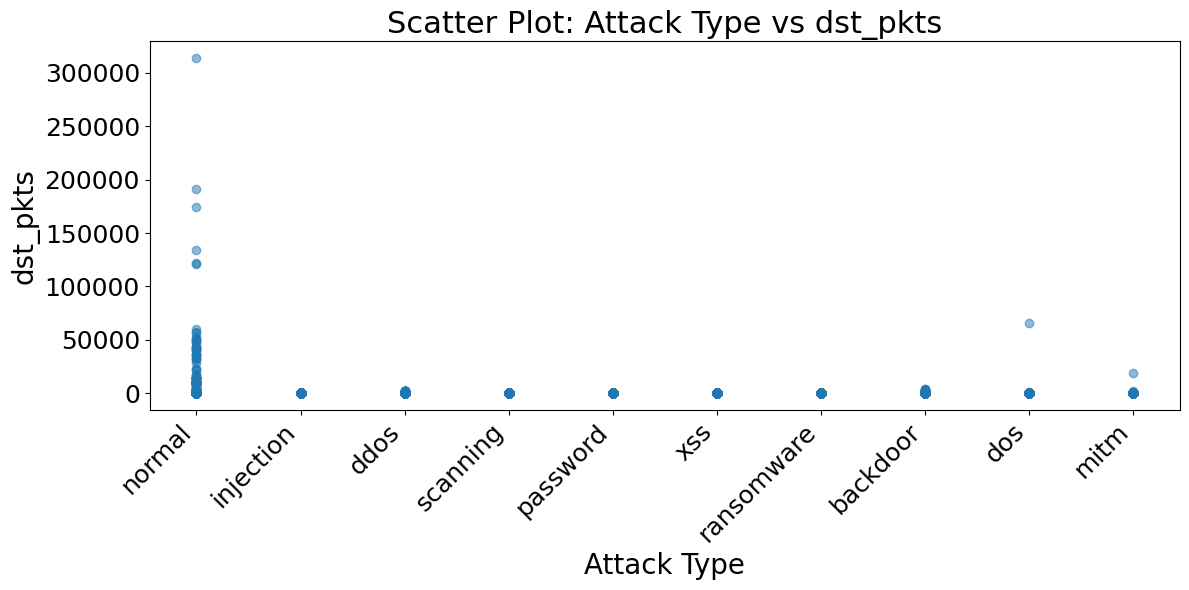

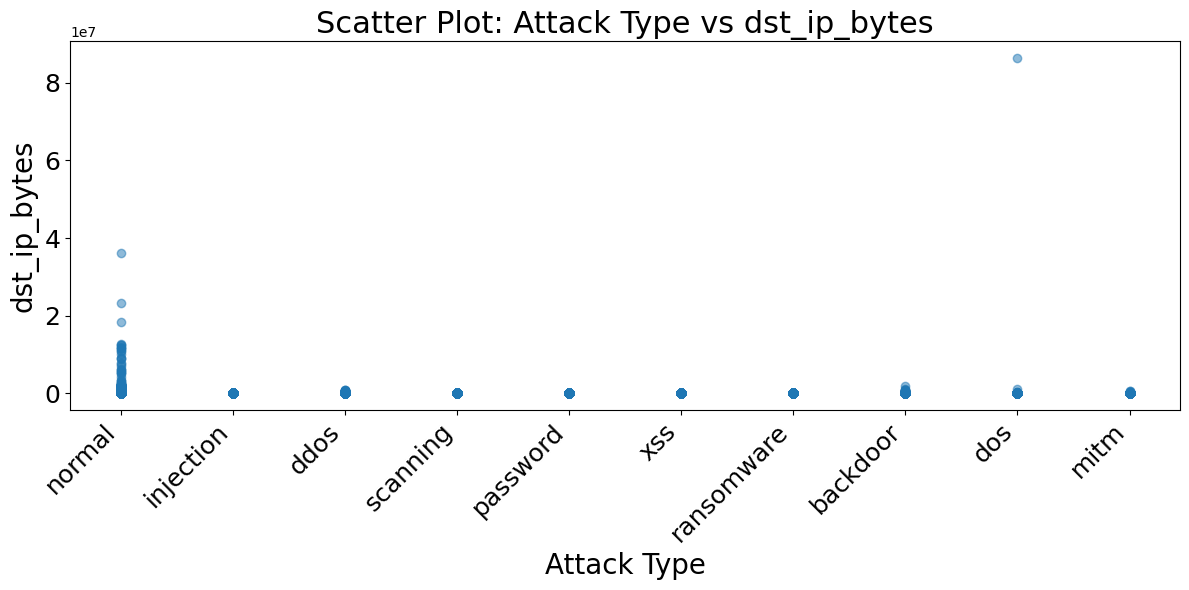

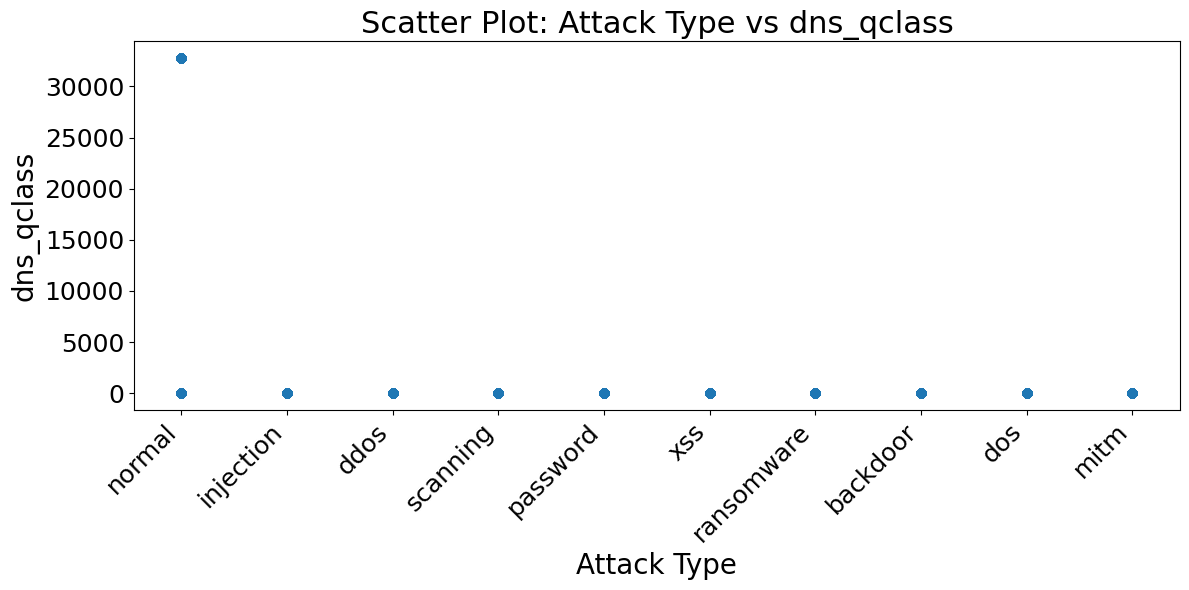

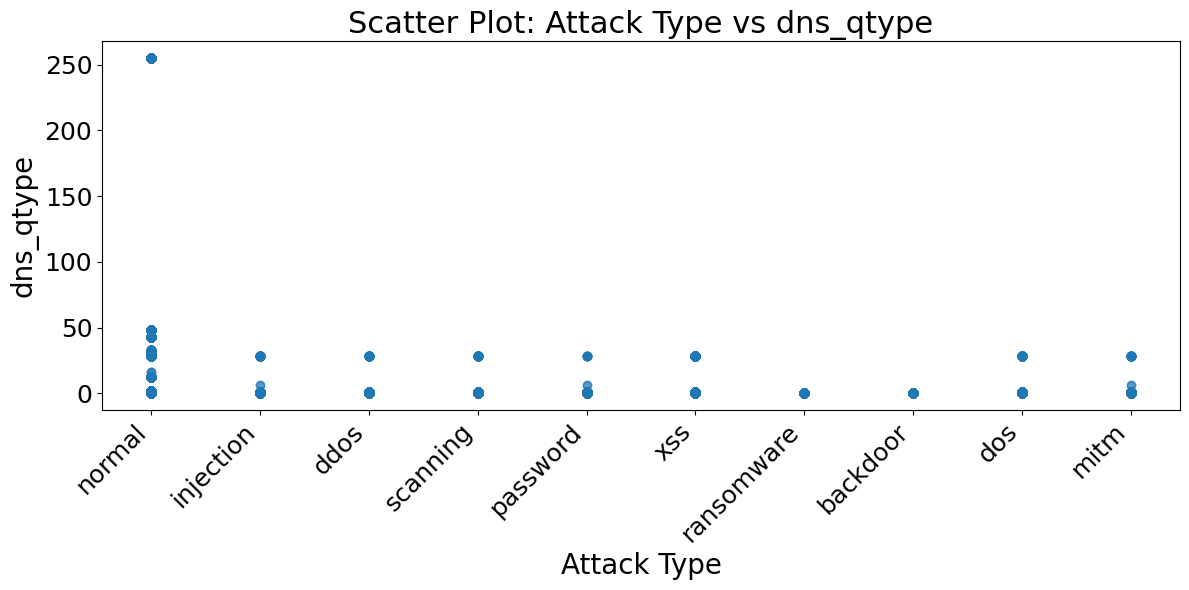

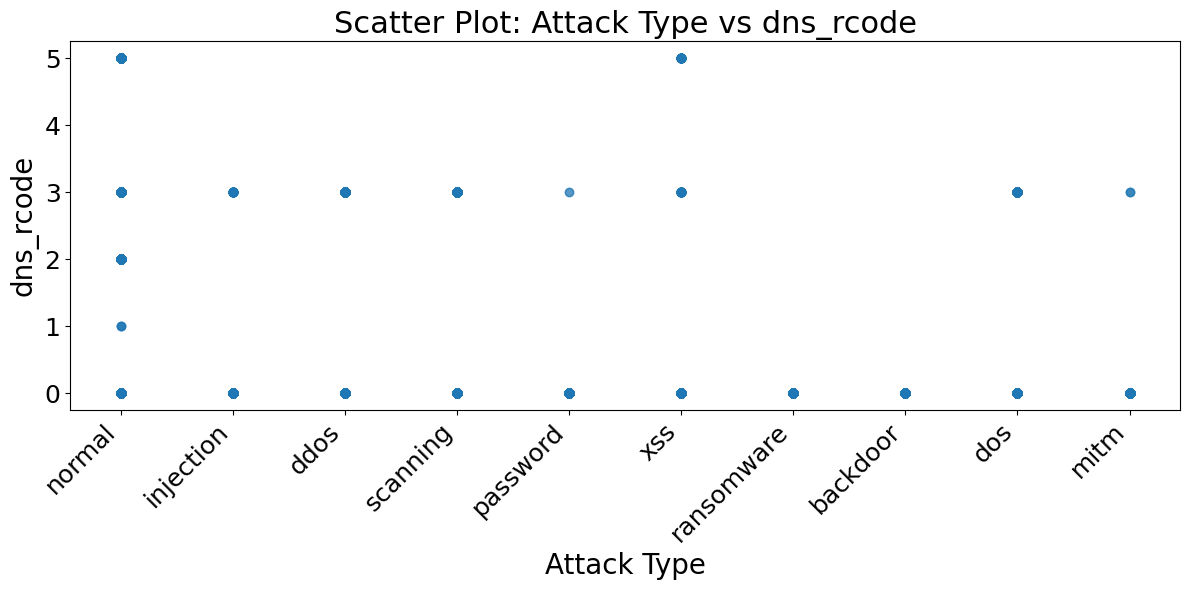

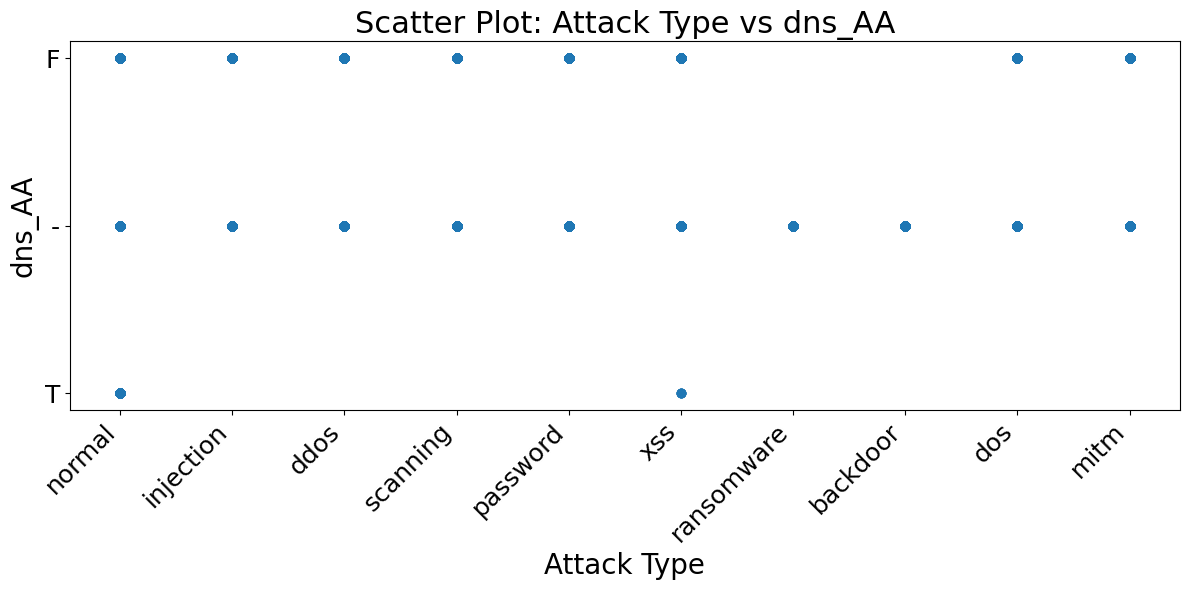

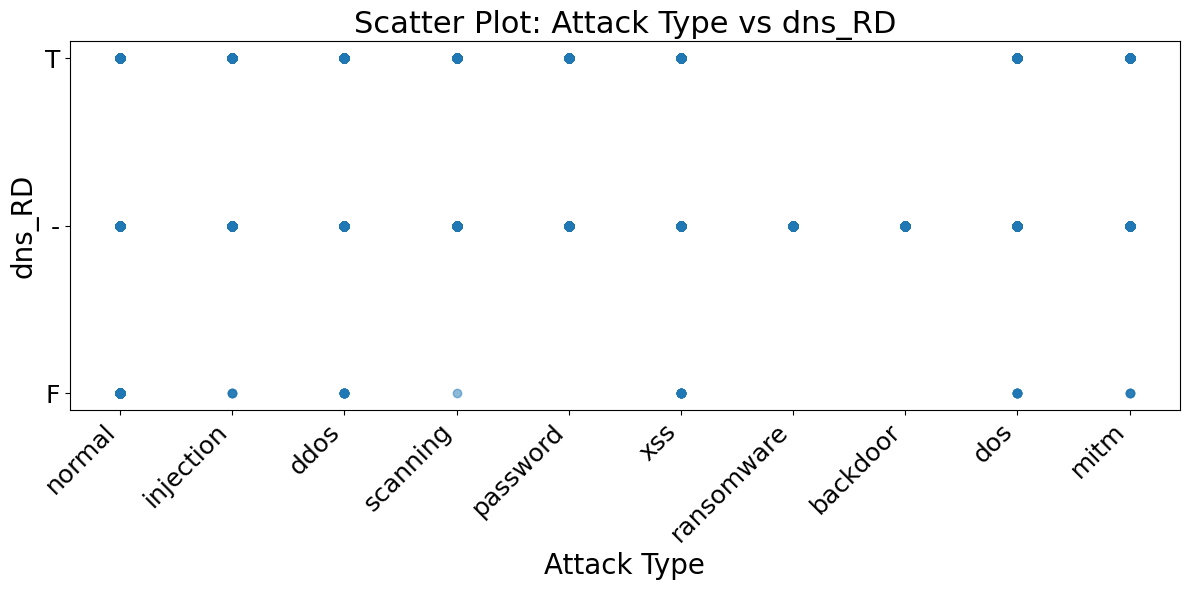

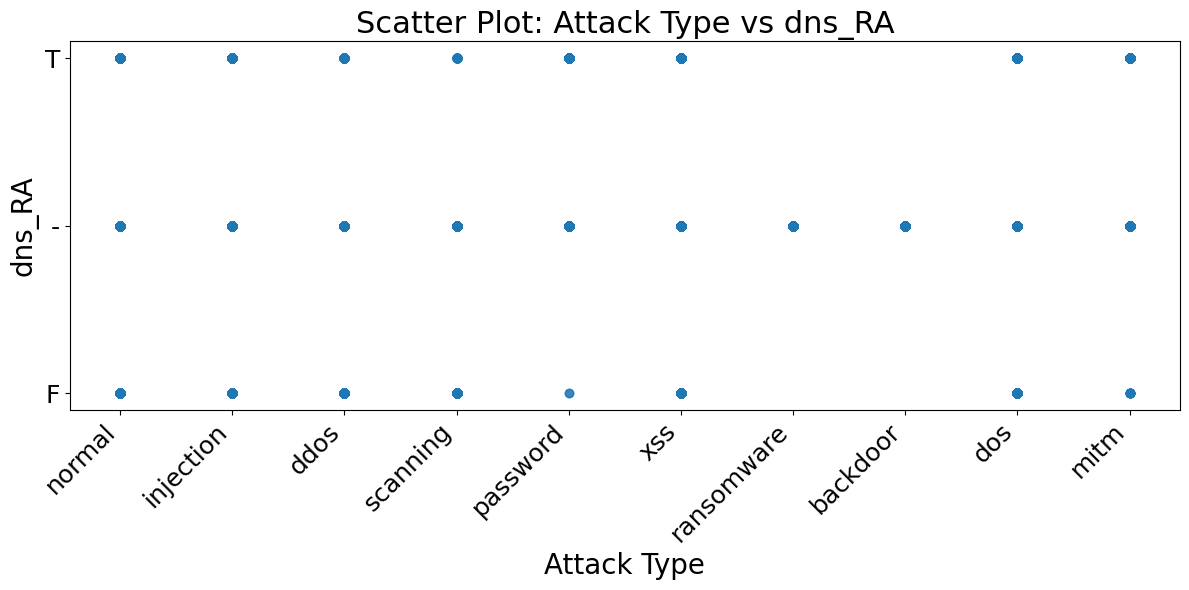

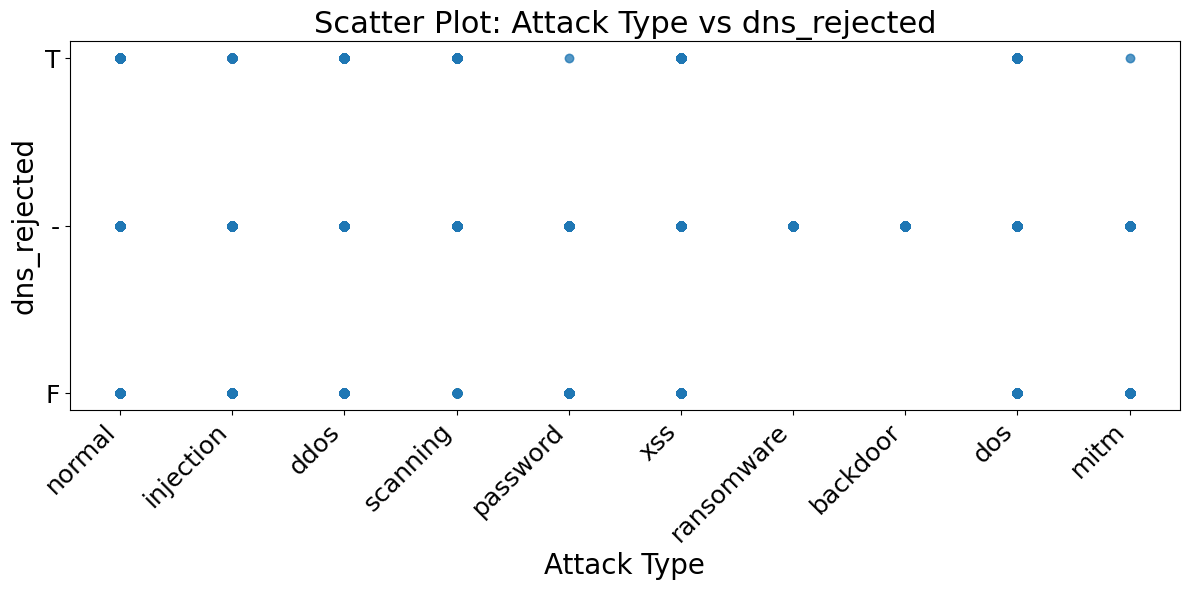

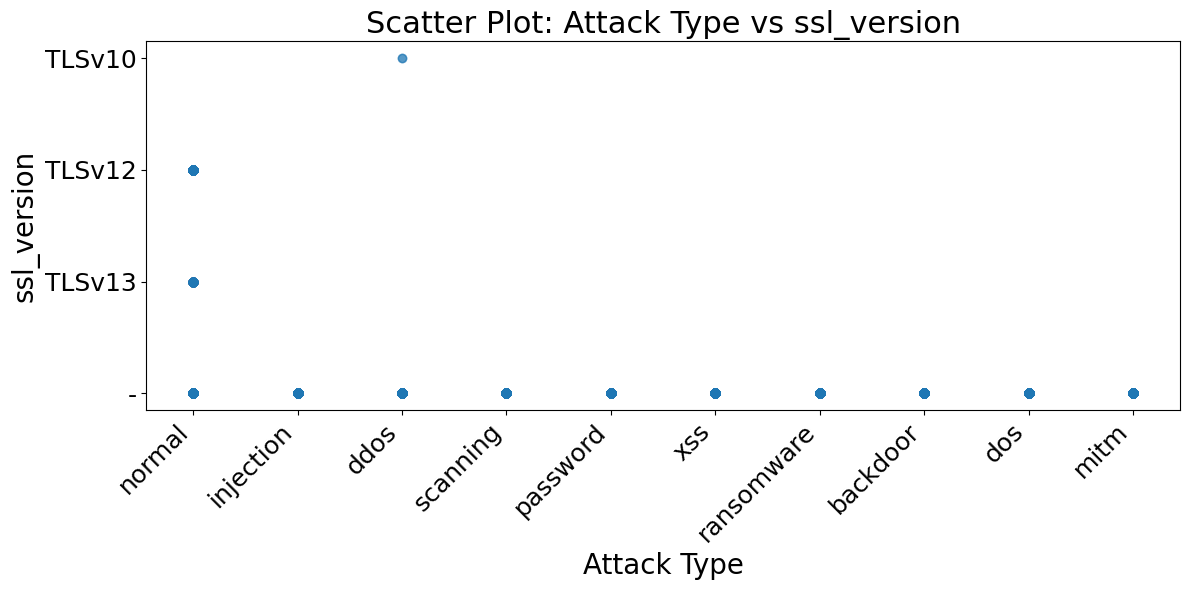

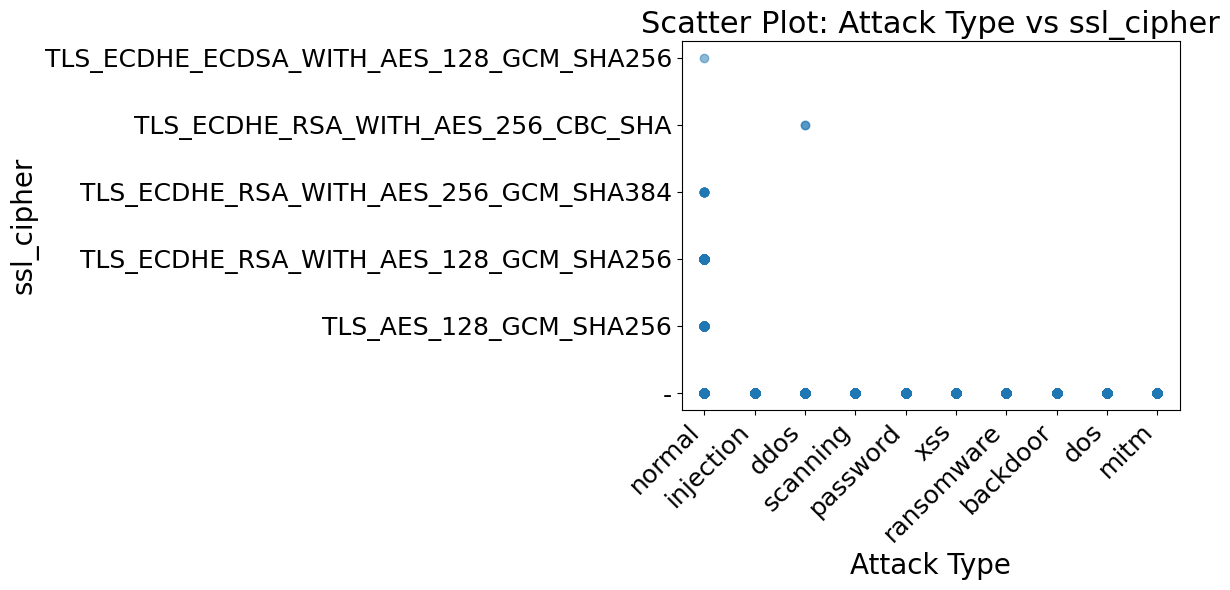

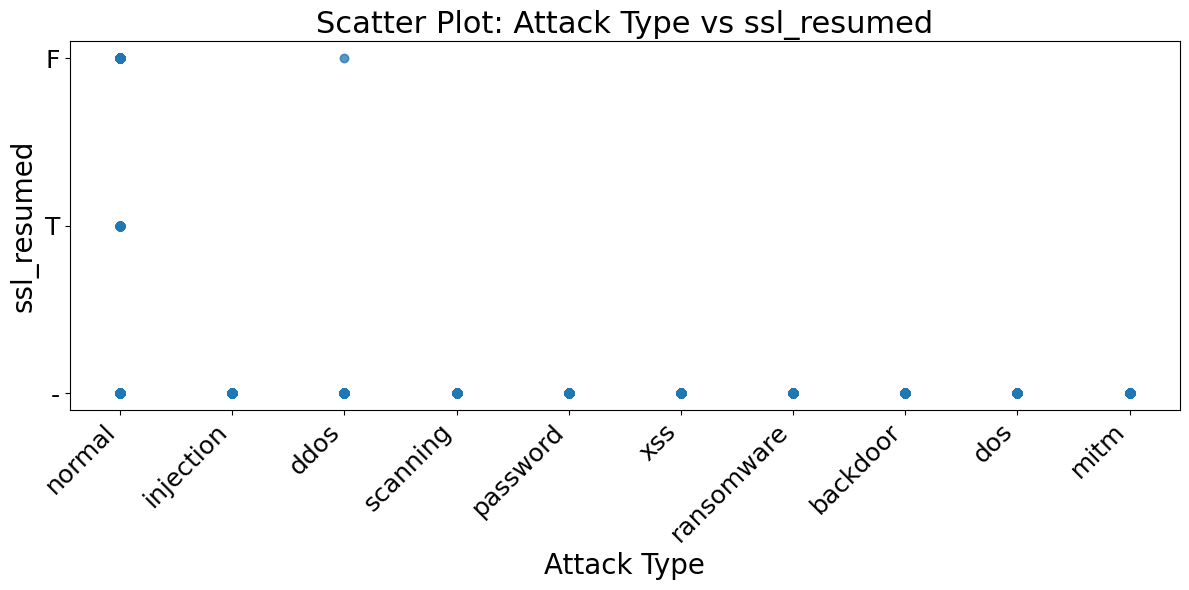

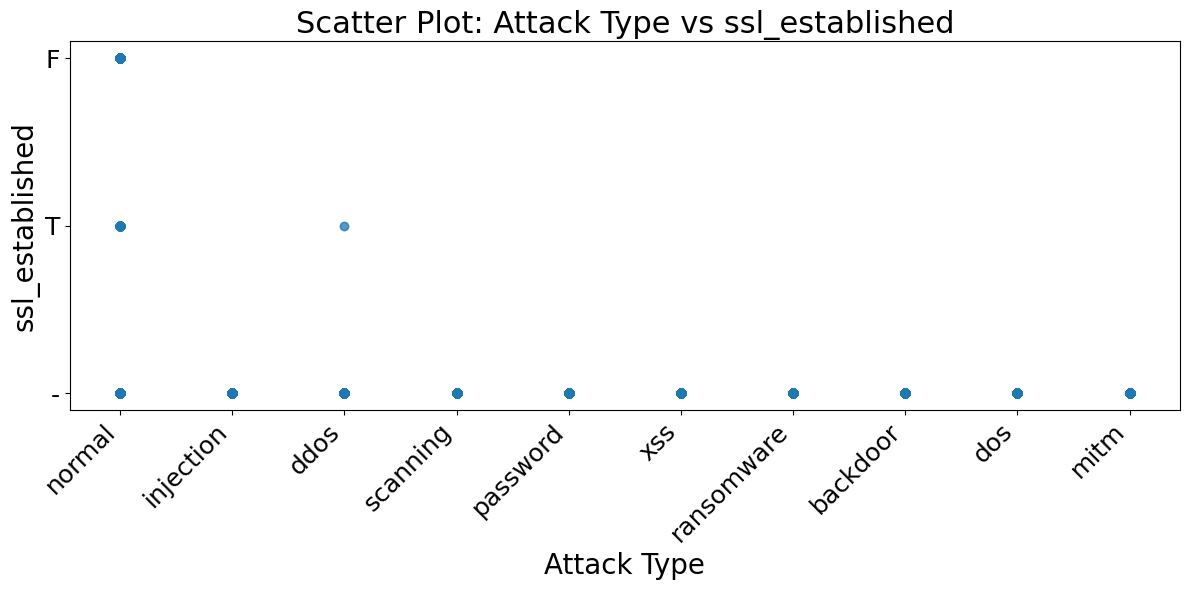

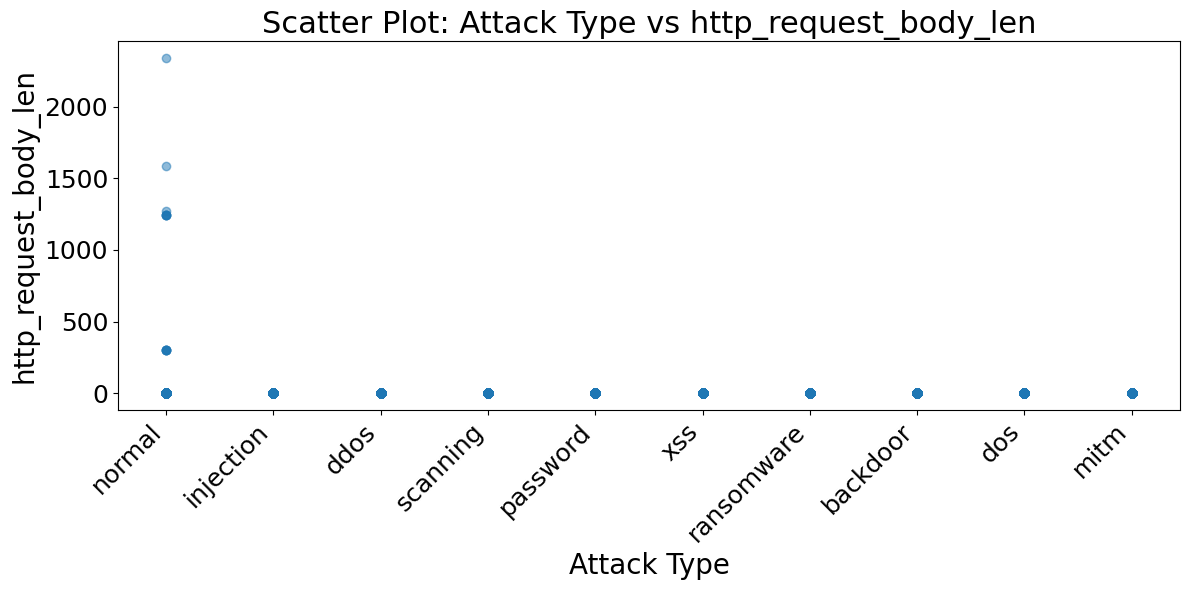

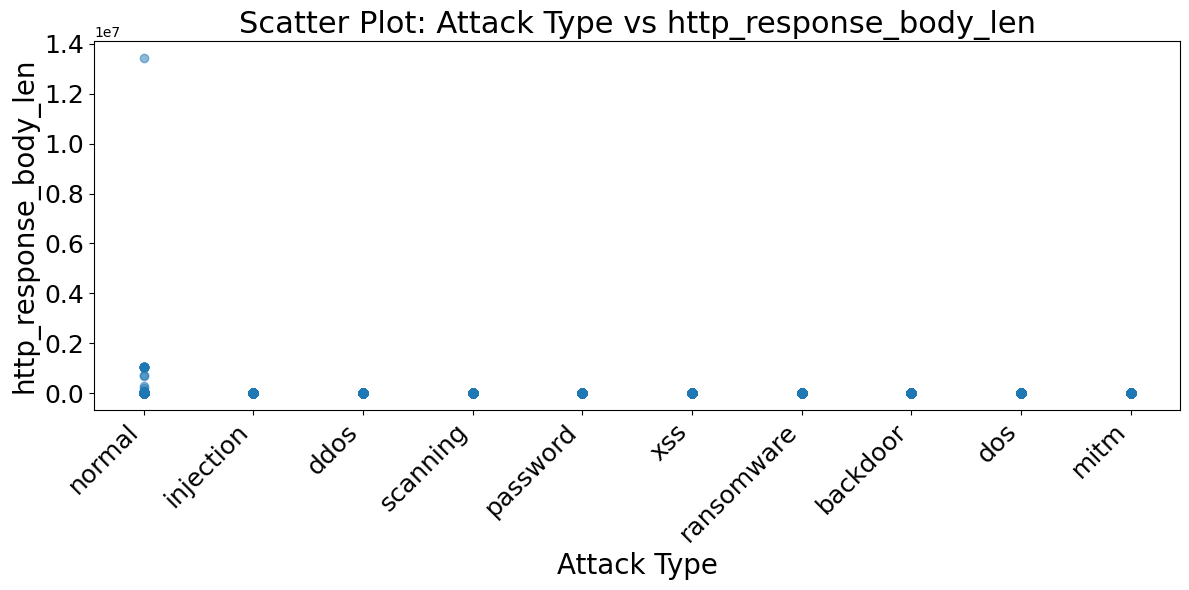

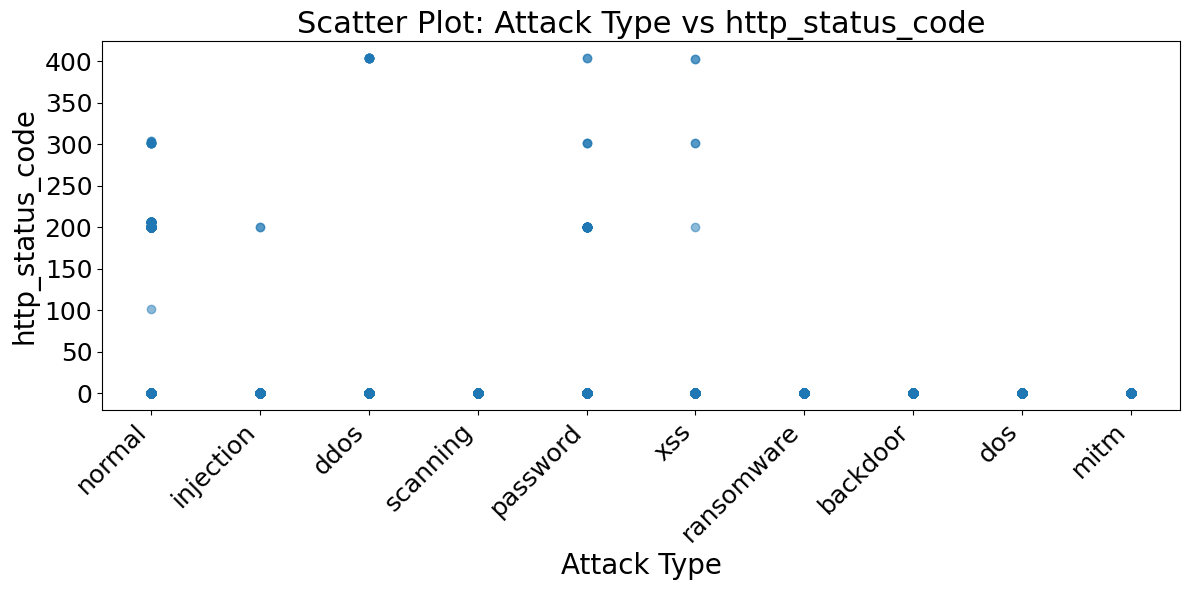

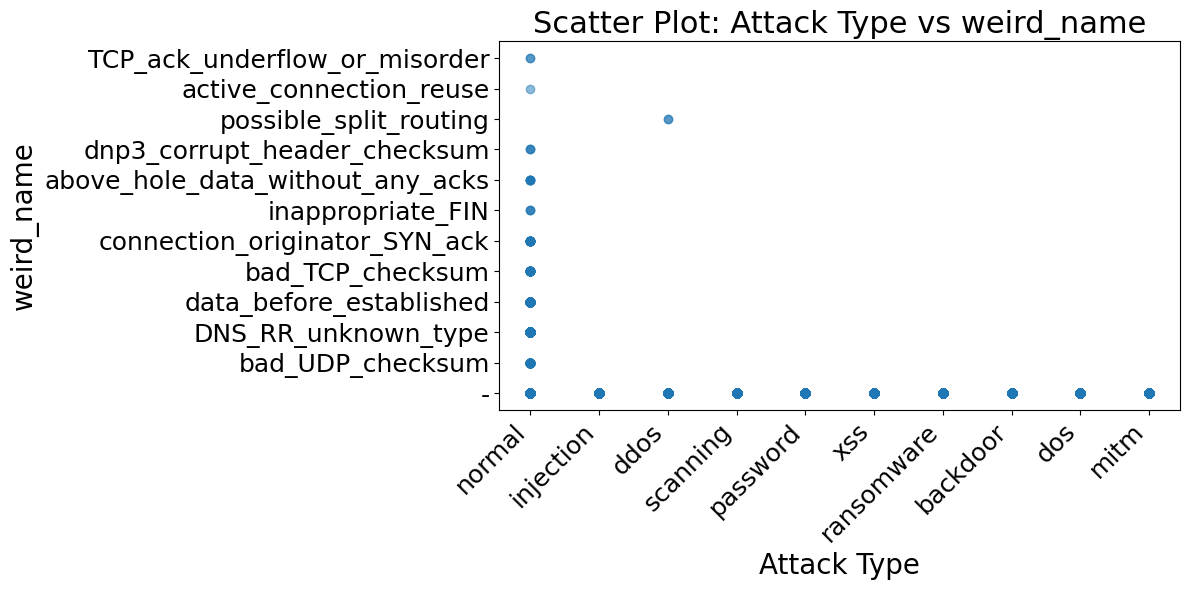

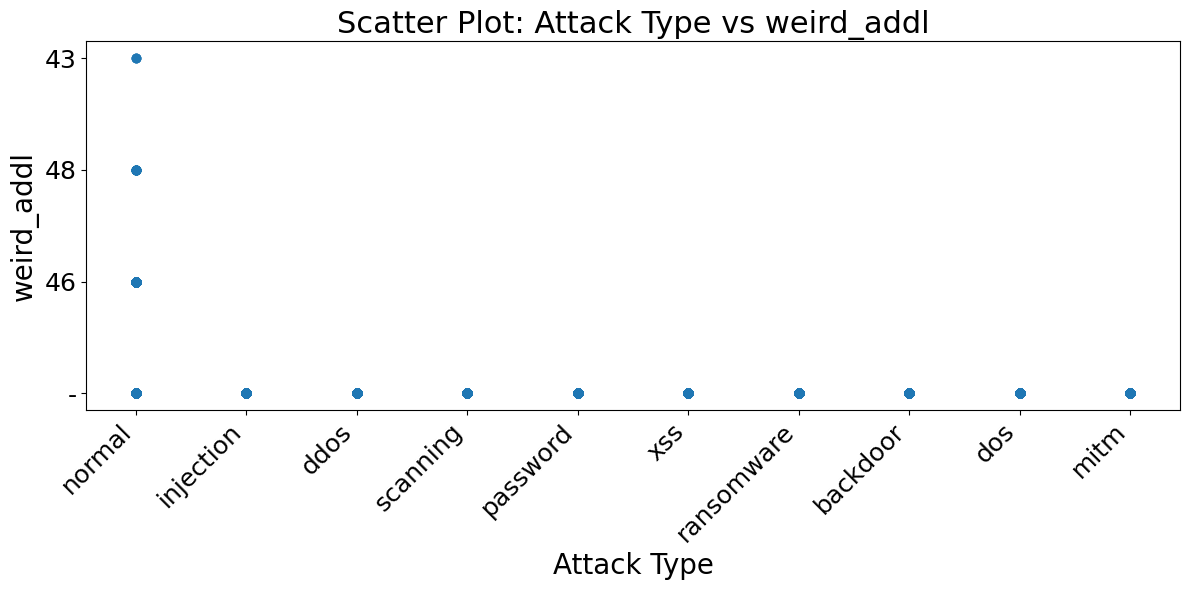

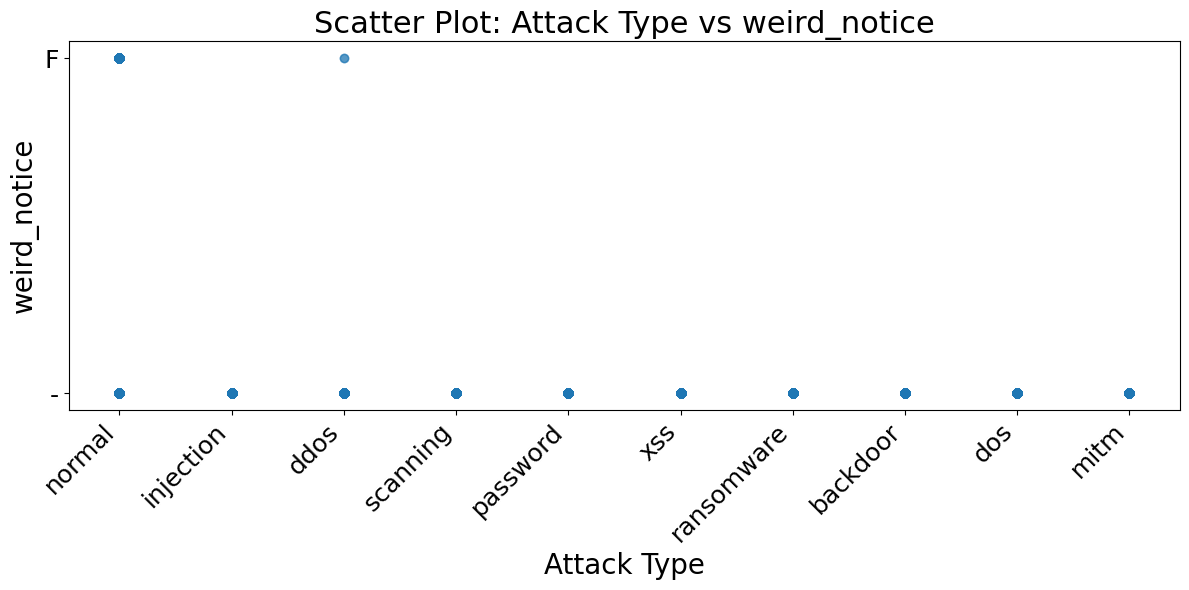

In [9]:
for i in columns:
    plt.figure(figsize=(12, 6))

    plt.scatter(df['type'], df[i], alpha=0.5)

    plt.title(f'Scatter Plot: Attack Type vs {i}', fontsize=22)
    plt.xlabel('Attack Type', fontsize=20)
    plt.ylabel(f'{i}', fontsize=20)

    plt.xticks(rotation=45, ha='right', fontsize=18)
    plt.yticks(fontsize=18)

    plt.tight_layout()

    plt.show()
